# Clase 3: Mapas autoorganizativos (SOM) y Redes neuronales de base radial

Aplicación de algoritmos de mapas autoorganizativos para la identificación de clientes fraudulentos de tarjetas de crédito bancarias e implementación, análisis y construcción de modelos de redes neuronales *RBF*.

**Autor**: Nicolás Cubero

**Fecha**: 12 de Abril de 2020

## Mapas autoorganizativos para la detección de clientes bancarios braudulentos

Como primer ejercicio, se tratará el desarrollo de mapas autoroganizativos de *Kohonen* (*SOM*) para la detección de clientes bancarios fraudulentos a partir de la información recogida en el *dataset* **Credit Card Applications**.

### Carga de librerías

Primeramente, se importan las librerías y módulos necesarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

### Carga del *dataset*

Cargamos el *dataset* **Credit Card Applications** y analizamos brevemente su estructura y la distribución de sus variables:

In [2]:
dataset = pd.read_csv('./Credit_Card_Applications.csv')

In [3]:
# Analizar estadísticos básicos del dataset
dataset.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [4]:
# Analizar las primeras columnas
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


Cada cliente *Customer* lleva asignado un identificador unívoco (*CustomerID*) y, sobre él se miden un total de 14 características (*A1-A14*).

Finalmente, a cada cliente se le asigna una clase con valor 1 si el cliente es aprobado para recibir el préstamo o 0 en caso contrario.


Para terminar, separamos los datos de los clientes de la clase asignada a los mismos y normalizamos los valores numéricos de los datos en el intervalo $[0,1]$ antes de utilizarlos para el entrenamiento de la red neuronal.

In [5]:
# Separar los datos de la clase
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

# Normalizar los datos
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

### Construcción del modelo SOM

Una vez cargados los datos y normalizados, procedemos a alimentar con los mismos nuestro modelo *SOM*.

Se partirá de una arquitectura de 10x10 redes neuronales con un radio para las *BMU* (*sigma*) de 0.1 y un ratio de aprendizaje (*learning rate*) de $10^{-5}$

In [6]:
# Preparar la arquitectura de nuestro mapa autoorganizativo que vamos a entrenar
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=1e-5)

Inicializamos los pesos de las neuronas de forma aleatoria y procedemos a entrenarlos durante 150 épocas.

In [7]:
som.random_weights_init(X)                         # Inicialización aleatoria de pesos
som.train_random(X, num_iteration=150, verbose=1) # Entrenamiento

 [ 150 / 150 ] 100% - 0:00:00 left 
 quantization error: 0.018615569413390133
 topographic error: 0.8579710144927536


### Visualización de resultados

Dado el modelo entrenado, se desea visualizar gráficamente la información aprendida por el modelo.

Para ello, se dibujará en una malla bidimensional todas las *BMUs* activadas, de forma que cada *BMU* es coloreada en función de la **distancia intermedia promedio** que guarda con el resto de neuronas.

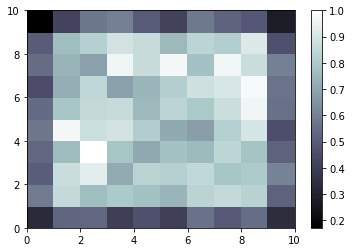

In [8]:
from pylab import bone, pcolor, colorbar, plot, show

# Dibujar el mapa autoorganizativo
bone()
pcolor(som.distance_map().T) # Mostrar el mapa coloreado con las distancias intermedias promedios
colorbar()                   # Mostrar una barra de color
show()

En el anterior mapa autoorganizativo, las neuronas coloreadas con colores más oscuros se corresponden con aquellas que guardan una menor distancia intermedia con sus neuronas vecinas, es decir, han aprendido un patrón muy similar a sus neuronas vecinas, mientras que las neuronas coloreadas con colores más claros guardan mayor distancia con sus neuronas vecinas, en otras palabras, han aprendido un patrón muy diferente al resto de neuronas.

Sobre el anterior diagrama dibujaremos dos tipos de marcadores sobre las neuronas:
- **Cuadrado verde** para aquellas neuronas que representen clientes a los que se les ha concedido el préstamo (clientes aprobados).
- **Círculo rojo** para aquellas neuronas que representen clientes considerados a los que se les ha denegado el préstamo.

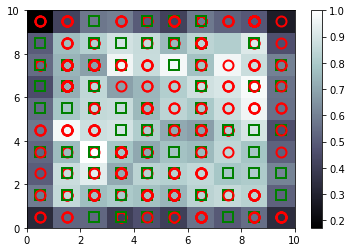

In [9]:
# Dibujar el mapa autoorganizativo con los marcadores
bone()
pcolor(som.distance_map().T) # Mostrar el mapa coloreado con las distancias intermedias promedios
colorbar()                   # Mostrar una barra de color

markers = ('o', 's')
colors = ('r', 'g')

for i, x in enumerate(X):
    
    # Conocer la BMU ganadora
    w = som.winner(x)
    
    plot(w[0] + 0.5,
         w[1] + 0.5,
        markers[Y[i]],
        markeredgecolor=colors[Y[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2)
show()

En la anterior imagen podemos observar la clase que se asignaría a los patrones aprendidos por cada neurona: Aquellos nodos con un cuadrado verde han aprendido un patrón similar a los clientes a los que se les ha aprobado el préstamo, los nodos con un círculo rojo representan neuronas que han aprendido un patrón similar a los clientes a los que se les deniega el préstamo, mientras que las neuronas con ambos marcadores han aprendido un patrón similar tanto a patrones que se consideran aprobados como no aprobados.

Tratamos de determinar con ayuda del mapa los clientes que se podrían considerar **fraudulentos** y que **se les ha concedido el préstamo**.

Para tal fin, nos ayudamos de las nodos blancos que han sido etiquetados tanto con un círculo rojo como con un cuadrado verde. Estos nodos al haber aprendido un patrón bien diferenciado de sus nodos vecinos que ha sido marcado tanto como cliente aprobado como cliente no aprobado, representan casos excepcionales de clientes que han sido tanto aprobados como no aprobados, es decir, clientes fraudulentos.

En nuestro mapa, nos basamos en los nodos (3,2), (7,3) y (6,8).

In [19]:
mappings = som.win_map(X) # Extraer los patrones aprendidos por todos los nodos

# Obtener todos los patrones fraudulentos y aplicar la desnormalización
frauds = np.concatenate((mappings[(3,2)],mappings[(7,3)],mappings[(6,8)]), axis=0)
frauds = scaler.inverse_transform(frauds)

In [20]:
# Mostramos estos patrones
frauds = pd.DataFrame(frauds, columns=dataset.columns[:-1])
frauds

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15599440.0,1.0,58.58,2.710,2.0,8.0,4.0,2.415,0.0,0.0,0.0,1.0,2.0,320.0,1.0
1,15615832.0,1.0,34.17,5.250,2.0,9.0,4.0,0.085,0.0,0.0,0.0,1.0,2.0,290.0,7.0
2,15594812.0,1.0,32.33,2.500,2.0,8.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0
3,15591010.0,1.0,47.83,4.165,2.0,14.0,5.0,0.085,0.0,0.0,0.0,1.0,2.0,520.0,1.0
4,15587266.0,1.0,28.58,3.625,2.0,6.0,4.0,0.250,0.0,0.0,0.0,1.0,2.0,100.0,1.0
5,15686913.0,1.0,28.00,3.000,2.0,9.0,4.0,0.750,0.0,0.0,0.0,1.0,2.0,300.0,68.0
6,15620832.0,1.0,37.33,2.665,2.0,13.0,4.0,0.165,0.0,0.0,0.0,1.0,2.0,0.0,502.0
7,15624423.0,1.0,24.75,0.540,2.0,7.0,4.0,1.000,0.0,0.0,0.0,1.0,2.0,120.0,2.0
8,15809909.0,1.0,30.58,2.710,1.0,7.0,4.0,0.125,0.0,0.0,0.0,1.0,1.0,80.0,1.0
9,15610042.0,0.0,20.42,10.500,1.0,14.0,8.0,0.000,0.0,0.0,0.0,1.0,2.0,154.0,33.0


## Redes neuronales de base radial

El segundo problema que se va a tratar, tratará, primeramente, una breve implementación de los algoritmos para la construcción de redes neuronales *rbf* aplicado a un problema de regresión de un único valor, seguido del estudio y ajuste de diversos modelos considerando diferentes configuraciones de sus parámetros. Para terminar, se analizarán los rendimientos de los modelos generados y se recogerá una serie de conclusiones.

El problema de regresión sobre el que se aplciarán estos modelos es la **predicción de la función seno**.

### Implementación de los algoritmos de entrenamiento para modelos *RBF*

En primer lugar, se elaborará una implementación de algoritmos y clases para el desarrollo de estos modelos *rbf*, puesto que el lenguaje *Python*, no presenta como tal, ninguna implementación oficial para el desarrollo de este tipo de modelos.

Definimos primermente la función *rbf*:

In [1]:
rbf = lambda x, c, s: np.exp(-1/ (2*s**2) * (x-c)**2)

Para el cálculo de los centros y desviaciones de cada neurona de capa oculta, se hará uso de *clustering* *K-Means* que implementamos en la siguiente función:

In [2]:
def kmeans(X, k):
    """Performs k-means clustering for 1D input
    Arguments:
    X {ndarray} -- A Mx1 array of inputs
    k {int} -- Number of clusters
    Returns:
    ndarray -- A kx1 array of final cluster centers
    """
    
    # randomly select initial clusters from input data
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False

    while not converged:
        """
        compute distances for each cluster center to each point
        where (distances[i, j] represents the distance between the ith poi
        nt and jth cluster)
        """
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
        
        # find the cluster that's closest to each point
        closestCluster = np.argmin(distances, axis=1)
        
        # update clusters by taking the mean of all of the points assigned to that cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)
            
        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()

    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)
    clustersWithNoPoints = []
    
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])

    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))

    return clusters, stds

Esta implementación del *KMeans* calcula el vector $u$ y $\sigma$ de cada una de los bases gaussianas de cada neurona de la capa oculta. Para aquellos *clústers* con un único patrón o ninguno, asigna como desviación típica la media de las desviaciones típicas del resto de clústers que presentan más de un patrón.

Por último, implementamos la siguiente clase *RBFNet* para llevar a cabo el entrenamiento de redes neuronales *rbf* y la predicción de datos a partir de las mismas:

In [34]:
class RBFNet(object):

    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True, verbose=False):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds
        self.verbose = verbose
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
        
    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std
            self.centers, _ = kmeans(X, self.k)
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)
            
        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b
                loss = (y[i] - F).flatten() ** 2

                if self.verbose:
                    print('Epoch: {0} - Loss: {1:.2f}'.format(epoch+1, loss[0]))

                # backward pass
                error = -(y[i] - F).flatten()

                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error
                
    # prediction
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)

        return np.array(y_pred)

### Ejecución de experimentos

Con esta implementación, procedemos a realizar diferentes experimentos probando diferentes configuraciones de parámetros, y utilizando como conjunto de datos de entrenamiento una muestra de 100 valores de la función seno a los cuales se ha añadido un ruido aleatorio.

In [5]:
# Muestrear valores de la función seno
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X) + noise

En primer lugar, se elabora un primer modelo considerando dos neuronas de capa oculta (k=2) y un ratio de aprendizaje *learning rate* de $10^{-2}$:

In [25]:
# Entrenar un modelo con k=2 y lr=1e-2
rbfnet1 = RBFNet(lr=1e-2, k=2)
rbfnet1.fit(X, y, verbose=True)

y_pred1 = rbfnet1.predict(X)
error_SSE1 = np.sum((y-y_pred1)**2)

Epoch: 1 - Loss: 0.85
Epoch: 1 - Loss: 0.89
Epoch: 1 - Loss: 0.64
Epoch: 1 - Loss: 0.57
Epoch: 1 - Loss: 0.44
Epoch: 1 - Loss: 0.35
Epoch: 1 - Loss: 0.20
Epoch: 1 - Loss: 0.26
Epoch: 1 - Loss: 0.12
Epoch: 1 - Loss: 0.14
Epoch: 1 - Loss: 0.19
Epoch: 1 - Loss: 0.07
Epoch: 1 - Loss: 0.08
Epoch: 1 - Loss: 0.03
Epoch: 1 - Loss: 0.04
Epoch: 1 - Loss: 0.04
Epoch: 1 - Loss: 0.00
Epoch: 1 - Loss: 0.00
Epoch: 1 - Loss: 0.00
Epoch: 1 - Loss: 0.00
Epoch: 1 - Loss: 0.00
Epoch: 1 - Loss: 0.00
Epoch: 1 - Loss: 0.00
Epoch: 1 - Loss: 0.01
Epoch: 1 - Loss: 0.01
Epoch: 1 - Loss: 0.00
Epoch: 1 - Loss: 0.00
Epoch: 1 - Loss: 0.00
Epoch: 1 - Loss: 0.01
Epoch: 1 - Loss: 0.11
Epoch: 1 - Loss: 0.17
Epoch: 1 - Loss: 0.11
Epoch: 1 - Loss: 0.20
Epoch: 1 - Loss: 0.34
Epoch: 1 - Loss: 0.67
Epoch: 1 - Loss: 0.73
Epoch: 1 - Loss: 0.80
Epoch: 1 - Loss: 0.80
Epoch: 1 - Loss: 0.77
Epoch: 1 - Loss: 0.66
Epoch: 1 - Loss: 1.05
Epoch: 1 - Loss: 1.41
Epoch: 1 - Loss: 1.20
Epoch: 1 - Loss: 1.17
Epoch: 1 - Loss: 1.28
Epoch: 1 -

Epoch: 5 - Loss: 0.04
Epoch: 5 - Loss: 0.09
Epoch: 6 - Loss: 0.00
Epoch: 6 - Loss: 0.00
Epoch: 6 - Loss: 0.01
Epoch: 6 - Loss: 0.01
Epoch: 6 - Loss: 0.03
Epoch: 6 - Loss: 0.03
Epoch: 6 - Loss: 0.07
Epoch: 6 - Loss: 0.03
Epoch: 6 - Loss: 0.11
Epoch: 6 - Loss: 0.09
Epoch: 6 - Loss: 0.03
Epoch: 6 - Loss: 0.07
Epoch: 6 - Loss: 0.05
Epoch: 6 - Loss: 0.10
Epoch: 6 - Loss: 0.07
Epoch: 6 - Loss: 0.07
Epoch: 6 - Loss: 0.15
Epoch: 6 - Loss: 0.17
Epoch: 6 - Loss: 0.16
Epoch: 6 - Loss: 0.19
Epoch: 6 - Loss: 0.22
Epoch: 6 - Loss: 0.25
Epoch: 6 - Loss: 0.17
Epoch: 6 - Loss: 0.13
Epoch: 6 - Loss: 0.30
Epoch: 6 - Loss: 0.29
Epoch: 6 - Loss: 0.28
Epoch: 6 - Loss: 0.34
Epoch: 6 - Loss: 0.55
Epoch: 6 - Loss: 0.35
Epoch: 6 - Loss: 0.39
Epoch: 6 - Loss: 0.51
Epoch: 6 - Loss: 0.38
Epoch: 6 - Loss: 0.25
Epoch: 6 - Loss: 0.19
Epoch: 6 - Loss: 0.17
Epoch: 6 - Loss: 0.16
Epoch: 6 - Loss: 0.16
Epoch: 6 - Loss: 0.18
Epoch: 6 - Loss: 0.23
Epoch: 6 - Loss: 0.15
Epoch: 6 - Loss: 0.04
Epoch: 6 - Loss: 0.11
Epoch: 6 -

Epoch: 14 - Loss: 0.16
Epoch: 14 - Loss: 0.12
Epoch: 14 - Loss: 0.08
Epoch: 14 - Loss: 0.07
Epoch: 14 - Loss: 0.12
Epoch: 14 - Loss: 0.05
Epoch: 14 - Loss: 0.13
Epoch: 14 - Loss: 0.05
Epoch: 14 - Loss: 0.06
Epoch: 14 - Loss: 0.02
Epoch: 14 - Loss: 0.02
Epoch: 14 - Loss: 0.01
Epoch: 14 - Loss: 0.00
Epoch: 14 - Loss: 0.00
Epoch: 14 - Loss: 0.01
Epoch: 14 - Loss: 0.01
Epoch: 14 - Loss: 0.03
Epoch: 15 - Loss: 0.05
Epoch: 15 - Loss: 0.07
Epoch: 15 - Loss: 0.04
Epoch: 15 - Loss: 0.04
Epoch: 15 - Loss: 0.03
Epoch: 15 - Loss: 0.05
Epoch: 15 - Loss: 0.02
Epoch: 15 - Loss: 0.04
Epoch: 15 - Loss: 0.00
Epoch: 15 - Loss: 0.01
Epoch: 15 - Loss: 0.05
Epoch: 15 - Loss: 0.04
Epoch: 15 - Loss: 0.05
Epoch: 15 - Loss: 0.02
Epoch: 15 - Loss: 0.03
Epoch: 15 - Loss: 0.03
Epoch: 15 - Loss: 0.00
Epoch: 15 - Loss: 0.00
Epoch: 15 - Loss: 0.00
Epoch: 15 - Loss: 0.00
Epoch: 15 - Loss: 0.01
Epoch: 15 - Loss: 0.02
Epoch: 15 - Loss: 0.00
Epoch: 15 - Loss: 0.00
Epoch: 15 - Loss: 0.04
Epoch: 15 - Loss: 0.05
Epoch: 15 -

Epoch: 27 - Loss: 0.08
Epoch: 27 - Loss: 0.07
Epoch: 27 - Loss: 0.06
Epoch: 27 - Loss: 0.08
Epoch: 27 - Loss: 0.04
Epoch: 27 - Loss: 0.07
Epoch: 27 - Loss: 0.02
Epoch: 27 - Loss: 0.02
Epoch: 27 - Loss: 0.07
Epoch: 27 - Loss: 0.06
Epoch: 27 - Loss: 0.07
Epoch: 27 - Loss: 0.03
Epoch: 27 - Loss: 0.05
Epoch: 27 - Loss: 0.05
Epoch: 27 - Loss: 0.01
Epoch: 27 - Loss: 0.00
Epoch: 27 - Loss: 0.00
Epoch: 27 - Loss: 0.00
Epoch: 27 - Loss: 0.00
Epoch: 27 - Loss: 0.01
Epoch: 27 - Loss: 0.00
Epoch: 27 - Loss: 0.00
Epoch: 27 - Loss: 0.03
Epoch: 27 - Loss: 0.03
Epoch: 27 - Loss: 0.04
Epoch: 27 - Loss: 0.07
Epoch: 27 - Loss: 0.32
Epoch: 27 - Loss: 0.20
Epoch: 27 - Loss: 0.29
Epoch: 27 - Loss: 0.40
Epoch: 27 - Loss: 0.30
Epoch: 27 - Loss: 0.20
Epoch: 27 - Loss: 0.21
Epoch: 27 - Loss: 0.20
Epoch: 27 - Loss: 0.20
Epoch: 27 - Loss: 0.20
Epoch: 27 - Loss: 0.23
Epoch: 27 - Loss: 0.29
Epoch: 27 - Loss: 0.25
Epoch: 27 - Loss: 0.11
Epoch: 27 - Loss: 0.22
Epoch: 27 - Loss: 0.21
Epoch: 27 - Loss: 0.16
Epoch: 27 -

Epoch: 39 - Loss: 0.30
Epoch: 39 - Loss: 0.18
Epoch: 39 - Loss: 0.27
Epoch: 39 - Loss: 0.38
Epoch: 39 - Loss: 0.28
Epoch: 39 - Loss: 0.18
Epoch: 39 - Loss: 0.20
Epoch: 39 - Loss: 0.19
Epoch: 39 - Loss: 0.18
Epoch: 39 - Loss: 0.19
Epoch: 39 - Loss: 0.22
Epoch: 39 - Loss: 0.28
Epoch: 39 - Loss: 0.24
Epoch: 39 - Loss: 0.10
Epoch: 39 - Loss: 0.21
Epoch: 39 - Loss: 0.21
Epoch: 39 - Loss: 0.15
Epoch: 39 - Loss: 0.18
Epoch: 39 - Loss: 0.12
Epoch: 39 - Loss: 0.08
Epoch: 39 - Loss: 0.05
Epoch: 39 - Loss: 0.06
Epoch: 39 - Loss: 0.05
Epoch: 39 - Loss: 0.03
Epoch: 39 - Loss: 0.08
Epoch: 39 - Loss: 0.09
Epoch: 39 - Loss: 0.01
Epoch: 39 - Loss: 0.01
Epoch: 39 - Loss: 0.01
Epoch: 39 - Loss: 0.00
Epoch: 39 - Loss: 0.00
Epoch: 39 - Loss: 0.02
Epoch: 39 - Loss: 0.02
Epoch: 39 - Loss: 0.00
Epoch: 39 - Loss: 0.00
Epoch: 39 - Loss: 0.00
Epoch: 39 - Loss: 0.00
Epoch: 39 - Loss: 0.01
Epoch: 39 - Loss: 0.00
Epoch: 39 - Loss: 0.00
Epoch: 39 - Loss: 0.00
Epoch: 39 - Loss: 0.02
Epoch: 39 - Loss: 0.01
Epoch: 39 -

Epoch: 51 - Loss: 0.00
Epoch: 51 - Loss: 0.00
Epoch: 51 - Loss: 0.00
Epoch: 51 - Loss: 0.01
Epoch: 51 - Loss: 0.00
Epoch: 51 - Loss: 0.07
Epoch: 51 - Loss: 0.05
Epoch: 51 - Loss: 0.03
Epoch: 51 - Loss: 0.04
Epoch: 51 - Loss: 0.08
Epoch: 51 - Loss: 0.09
Epoch: 51 - Loss: 0.11
Epoch: 51 - Loss: 0.11
Epoch: 51 - Loss: 0.10
Epoch: 51 - Loss: 0.13
Epoch: 51 - Loss: 0.18
Epoch: 51 - Loss: 0.13
Epoch: 51 - Loss: 0.16
Epoch: 51 - Loss: 0.12
Epoch: 51 - Loss: 0.08
Epoch: 51 - Loss: 0.07
Epoch: 51 - Loss: 0.14
Epoch: 51 - Loss: 0.07
Epoch: 51 - Loss: 0.17
Epoch: 51 - Loss: 0.08
Epoch: 51 - Loss: 0.10
Epoch: 51 - Loss: 0.06
Epoch: 51 - Loss: 0.05
Epoch: 51 - Loss: 0.04
Epoch: 51 - Loss: 0.01
Epoch: 51 - Loss: 0.01
Epoch: 51 - Loss: 0.00
Epoch: 51 - Loss: 0.00
Epoch: 51 - Loss: 0.00
Epoch: 52 - Loss: 0.14
Epoch: 52 - Loss: 0.17
Epoch: 52 - Loss: 0.11
Epoch: 52 - Loss: 0.10
Epoch: 52 - Loss: 0.08
Epoch: 52 - Loss: 0.09
Epoch: 52 - Loss: 0.05
Epoch: 52 - Loss: 0.08
Epoch: 52 - Loss: 0.02
Epoch: 52 -

Epoch: 63 - Loss: 0.13
Epoch: 63 - Loss: 0.18
Epoch: 63 - Loss: 0.13
Epoch: 63 - Loss: 0.16
Epoch: 63 - Loss: 0.12
Epoch: 63 - Loss: 0.08
Epoch: 63 - Loss: 0.08
Epoch: 63 - Loss: 0.14
Epoch: 63 - Loss: 0.07
Epoch: 63 - Loss: 0.18
Epoch: 63 - Loss: 0.09
Epoch: 63 - Loss: 0.11
Epoch: 63 - Loss: 0.06
Epoch: 63 - Loss: 0.06
Epoch: 63 - Loss: 0.05
Epoch: 63 - Loss: 0.02
Epoch: 63 - Loss: 0.01
Epoch: 63 - Loss: 0.00
Epoch: 63 - Loss: 0.01
Epoch: 63 - Loss: 0.00
Epoch: 64 - Loss: 0.15
Epoch: 64 - Loss: 0.18
Epoch: 64 - Loss: 0.12
Epoch: 64 - Loss: 0.11
Epoch: 64 - Loss: 0.08
Epoch: 64 - Loss: 0.09
Epoch: 64 - Loss: 0.05
Epoch: 64 - Loss: 0.08
Epoch: 64 - Loss: 0.02
Epoch: 64 - Loss: 0.03
Epoch: 64 - Loss: 0.07
Epoch: 64 - Loss: 0.05
Epoch: 64 - Loss: 0.06
Epoch: 64 - Loss: 0.02
Epoch: 64 - Loss: 0.03
Epoch: 64 - Loss: 0.03
Epoch: 64 - Loss: 0.00
Epoch: 64 - Loss: 0.00
Epoch: 64 - Loss: 0.00
Epoch: 64 - Loss: 0.00
Epoch: 64 - Loss: 0.01
Epoch: 64 - Loss: 0.02
Epoch: 64 - Loss: 0.00
Epoch: 64 -

Epoch: 75 - Loss: 0.07
Epoch: 75 - Loss: 0.09
Epoch: 75 - Loss: 0.10
Epoch: 75 - Loss: 0.11
Epoch: 75 - Loss: 0.10
Epoch: 75 - Loss: 0.13
Epoch: 75 - Loss: 0.18
Epoch: 75 - Loss: 0.13
Epoch: 75 - Loss: 0.16
Epoch: 75 - Loss: 0.13
Epoch: 75 - Loss: 0.08
Epoch: 75 - Loss: 0.08
Epoch: 75 - Loss: 0.15
Epoch: 75 - Loss: 0.07
Epoch: 75 - Loss: 0.19
Epoch: 75 - Loss: 0.09
Epoch: 75 - Loss: 0.11
Epoch: 75 - Loss: 0.07
Epoch: 75 - Loss: 0.06
Epoch: 75 - Loss: 0.06
Epoch: 75 - Loss: 0.02
Epoch: 75 - Loss: 0.01
Epoch: 75 - Loss: 0.00
Epoch: 75 - Loss: 0.01
Epoch: 75 - Loss: 0.00
Epoch: 76 - Loss: 0.16
Epoch: 76 - Loss: 0.19
Epoch: 76 - Loss: 0.12
Epoch: 76 - Loss: 0.11
Epoch: 76 - Loss: 0.09
Epoch: 76 - Loss: 0.10
Epoch: 76 - Loss: 0.05
Epoch: 76 - Loss: 0.08
Epoch: 76 - Loss: 0.02
Epoch: 76 - Loss: 0.03
Epoch: 76 - Loss: 0.07
Epoch: 76 - Loss: 0.04
Epoch: 76 - Loss: 0.05
Epoch: 76 - Loss: 0.02
Epoch: 76 - Loss: 0.03
Epoch: 76 - Loss: 0.03
Epoch: 76 - Loss: 0.00
Epoch: 76 - Loss: 0.00
Epoch: 76 -

Epoch: 87 - Loss: 0.07
Epoch: 87 - Loss: 0.07
Epoch: 87 - Loss: 0.06
Epoch: 87 - Loss: 0.02
Epoch: 87 - Loss: 0.02
Epoch: 87 - Loss: 0.00
Epoch: 87 - Loss: 0.01
Epoch: 87 - Loss: 0.00
Epoch: 88 - Loss: 0.17
Epoch: 88 - Loss: 0.20
Epoch: 88 - Loss: 0.13
Epoch: 88 - Loss: 0.12
Epoch: 88 - Loss: 0.09
Epoch: 88 - Loss: 0.10
Epoch: 88 - Loss: 0.05
Epoch: 88 - Loss: 0.08
Epoch: 88 - Loss: 0.02
Epoch: 88 - Loss: 0.03
Epoch: 88 - Loss: 0.07
Epoch: 88 - Loss: 0.04
Epoch: 88 - Loss: 0.05
Epoch: 88 - Loss: 0.02
Epoch: 88 - Loss: 0.03
Epoch: 88 - Loss: 0.03
Epoch: 88 - Loss: 0.00
Epoch: 88 - Loss: 0.00
Epoch: 88 - Loss: 0.00
Epoch: 88 - Loss: 0.00
Epoch: 88 - Loss: 0.01
Epoch: 88 - Loss: 0.02
Epoch: 88 - Loss: 0.00
Epoch: 88 - Loss: 0.00
Epoch: 88 - Loss: 0.04
Epoch: 88 - Loss: 0.04
Epoch: 88 - Loss: 0.05
Epoch: 88 - Loss: 0.08
Epoch: 88 - Loss: 0.27
Epoch: 88 - Loss: 0.15
Epoch: 88 - Loss: 0.23
Epoch: 88 - Loss: 0.33
Epoch: 88 - Loss: 0.23
Epoch: 88 - Loss: 0.15
Epoch: 88 - Loss: 0.17
Epoch: 88 -

Epoch: 98 - Loss: 0.00
Epoch: 98 - Loss: 0.00
Epoch: 98 - Loss: 0.00
Epoch: 98 - Loss: 0.00
Epoch: 98 - Loss: 0.00
Epoch: 98 - Loss: 0.01
Epoch: 98 - Loss: 0.00
Epoch: 98 - Loss: 0.05
Epoch: 98 - Loss: 0.04
Epoch: 98 - Loss: 0.02
Epoch: 98 - Loss: 0.03
Epoch: 98 - Loss: 0.07
Epoch: 98 - Loss: 0.08
Epoch: 98 - Loss: 0.10
Epoch: 98 - Loss: 0.11
Epoch: 98 - Loss: 0.10
Epoch: 98 - Loss: 0.13
Epoch: 98 - Loss: 0.18
Epoch: 98 - Loss: 0.13
Epoch: 98 - Loss: 0.16
Epoch: 98 - Loss: 0.13
Epoch: 98 - Loss: 0.08
Epoch: 98 - Loss: 0.08
Epoch: 98 - Loss: 0.15
Epoch: 98 - Loss: 0.08
Epoch: 98 - Loss: 0.20
Epoch: 98 - Loss: 0.10
Epoch: 98 - Loss: 0.12
Epoch: 98 - Loss: 0.08
Epoch: 98 - Loss: 0.07
Epoch: 98 - Loss: 0.06
Epoch: 98 - Loss: 0.03
Epoch: 98 - Loss: 0.02
Epoch: 98 - Loss: 0.01
Epoch: 98 - Loss: 0.01
Epoch: 98 - Loss: 0.00
Epoch: 99 - Loss: 0.18
Epoch: 99 - Loss: 0.21
Epoch: 99 - Loss: 0.13
Epoch: 99 - Loss: 0.12
Epoch: 99 - Loss: 0.09
Epoch: 99 - Loss: 0.10
Epoch: 99 - Loss: 0.05
Epoch: 99 -

Se dibuja la función seno aprendida por el modelo:

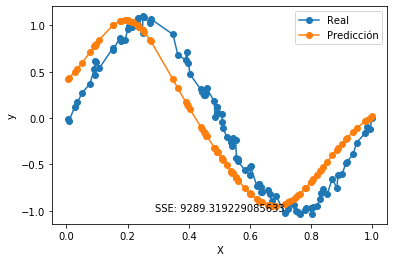

In [27]:
# Dibujar la función real y la función aprendida por el modelo
plt.plot(X, y, marker='o', label='Real')             # Función real
plt.plot(X, y_pred1, marker='o', label='Predicción') # Función aprendida
plt.xlabel('X')
plt.ylabel('y')
plt.text(x=0.5, y=-1, s='SSE: {}'.format(error_SSE1), horizontalalignment='center')
plt.legend()

plt.show()


Se observa que la curva de la función aprendida por el modelo generado presenta algunas diferencias respecto a la curva real.

Se repite el experimento, considerando un valor de k = 4:

In [28]:
# Entrenar un modelo con k=4 y lr=1e-2
rbfnet2 = RBFNet(lr=1e-2, k=4)
rbfnet2.fit(X, y, verbose=True)

y_pred2 = rbfnet2.predict(X)
error_SSE2 = np.sum((y-y_pred2)**2)

print('Error SSE cometido: ', error_SSE2)

Epoch: 1 - Loss: 0.57
Epoch: 1 - Loss: 0.64
Epoch: 1 - Loss: 0.59
Epoch: 1 - Loss: 0.61
Epoch: 1 - Loss: 0.66
Epoch: 1 - Loss: 0.90
Epoch: 1 - Loss: 0.84
Epoch: 1 - Loss: 0.96
Epoch: 1 - Loss: 0.68
Epoch: 1 - Loss: 0.74
Epoch: 1 - Loss: 0.99
Epoch: 1 - Loss: 0.93
Epoch: 1 - Loss: 0.94
Epoch: 1 - Loss: 0.62
Epoch: 1 - Loss: 0.63
Epoch: 1 - Loss: 0.49
Epoch: 1 - Loss: 0.26
Epoch: 1 - Loss: 0.18
Epoch: 1 - Loss: 0.13
Epoch: 1 - Loss: 0.09
Epoch: 1 - Loss: 0.02
Epoch: 1 - Loss: 0.01
Epoch: 1 - Loss: 0.02
Epoch: 1 - Loss: 0.01
Epoch: 1 - Loss: 0.01
Epoch: 1 - Loss: 0.01
Epoch: 1 - Loss: 0.04
Epoch: 1 - Loss: 0.08
Epoch: 1 - Loss: 0.26
Epoch: 1 - Loss: 0.12
Epoch: 1 - Loss: 0.15
Epoch: 1 - Loss: 0.22
Epoch: 1 - Loss: 0.14
Epoch: 1 - Loss: 0.07
Epoch: 1 - Loss: 0.05
Epoch: 1 - Loss: 0.04
Epoch: 1 - Loss: 0.04
Epoch: 1 - Loss: 0.04
Epoch: 1 - Loss: 0.05
Epoch: 1 - Loss: 0.08
Epoch: 1 - Loss: 0.02
Epoch: 1 - Loss: 0.00
Epoch: 1 - Loss: 0.00
Epoch: 1 - Loss: 0.00
Epoch: 1 - Loss: 0.00
Epoch: 1 -

Epoch: 5 - Loss: 0.87
Epoch: 5 - Loss: 0.65
Epoch: 5 - Loss: 0.48
Epoch: 5 - Loss: 0.42
Epoch: 5 - Loss: 0.38
Epoch: 5 - Loss: 0.37
Epoch: 5 - Loss: 0.38
Epoch: 5 - Loss: 0.44
Epoch: 5 - Loss: 0.26
Epoch: 5 - Loss: 0.11
Epoch: 5 - Loss: 0.19
Epoch: 5 - Loss: 0.18
Epoch: 5 - Loss: 0.13
Epoch: 5 - Loss: 0.11
Epoch: 5 - Loss: 0.06
Epoch: 5 - Loss: 0.03
Epoch: 5 - Loss: 0.00
Epoch: 5 - Loss: 0.00
Epoch: 5 - Loss: 0.00
Epoch: 5 - Loss: 0.00
Epoch: 5 - Loss: 0.00
Epoch: 5 - Loss: 0.00
Epoch: 5 - Loss: 0.02
Epoch: 5 - Loss: 0.03
Epoch: 5 - Loss: 0.03
Epoch: 5 - Loss: 0.07
Epoch: 5 - Loss: 0.08
Epoch: 5 - Loss: 0.04
Epoch: 5 - Loss: 0.03
Epoch: 5 - Loss: 0.12
Epoch: 5 - Loss: 0.10
Epoch: 5 - Loss: 0.10
Epoch: 5 - Loss: 0.10
Epoch: 5 - Loss: 0.14
Epoch: 5 - Loss: 0.13
Epoch: 5 - Loss: 0.09
Epoch: 5 - Loss: 0.11
Epoch: 5 - Loss: 0.16
Epoch: 5 - Loss: 0.12
Epoch: 5 - Loss: 0.31
Epoch: 5 - Loss: 0.29
Epoch: 5 - Loss: 0.24
Epoch: 5 - Loss: 0.29
Epoch: 5 - Loss: 0.38
Epoch: 5 - Loss: 0.42
Epoch: 5 -

Epoch: 9 - Loss: 0.06
Epoch: 9 - Loss: 0.13
Epoch: 10 - Loss: 0.01
Epoch: 10 - Loss: 0.00
Epoch: 10 - Loss: 0.00
Epoch: 10 - Loss: 0.00
Epoch: 10 - Loss: 0.00
Epoch: 10 - Loss: 0.04
Epoch: 10 - Loss: 0.03
Epoch: 10 - Loss: 0.07
Epoch: 10 - Loss: 0.01
Epoch: 10 - Loss: 0.03
Epoch: 10 - Loss: 0.10
Epoch: 10 - Loss: 0.10
Epoch: 10 - Loss: 0.11
Epoch: 10 - Loss: 0.03
Epoch: 10 - Loss: 0.03
Epoch: 10 - Loss: 0.01
Epoch: 10 - Loss: 0.01
Epoch: 10 - Loss: 0.03
Epoch: 10 - Loss: 0.06
Epoch: 10 - Loss: 0.08
Epoch: 10 - Loss: 0.20
Epoch: 10 - Loss: 0.25
Epoch: 10 - Loss: 0.21
Epoch: 10 - Loss: 0.25
Epoch: 10 - Loss: 0.46
Epoch: 10 - Loss: 0.48
Epoch: 10 - Loss: 0.67
Epoch: 10 - Loss: 0.79
Epoch: 10 - Loss: 1.26
Epoch: 10 - Loss: 0.85
Epoch: 10 - Loss: 0.75
Epoch: 10 - Loss: 0.87
Epoch: 10 - Loss: 0.65
Epoch: 10 - Loss: 0.44
Epoch: 10 - Loss: 0.20
Epoch: 10 - Loss: 0.16
Epoch: 10 - Loss: 0.13
Epoch: 10 - Loss: 0.12
Epoch: 10 - Loss: 0.13
Epoch: 10 - Loss: 0.17
Epoch: 10 - Loss: 0.06
Epoch: 10 - L

Epoch: 14 - Loss: 0.00
Epoch: 14 - Loss: 0.00
Epoch: 14 - Loss: 0.00
Epoch: 14 - Loss: 0.00
Epoch: 14 - Loss: 0.00
Epoch: 14 - Loss: 0.00
Epoch: 14 - Loss: 0.00
Epoch: 14 - Loss: 0.00
Epoch: 14 - Loss: 0.06
Epoch: 14 - Loss: 0.06
Epoch: 14 - Loss: 0.05
Epoch: 14 - Loss: 0.09
Epoch: 14 - Loss: 0.15
Epoch: 14 - Loss: 0.19
Epoch: 14 - Loss: 0.23
Epoch: 14 - Loss: 0.26
Epoch: 14 - Loss: 0.25
Epoch: 14 - Loss: 0.29
Epoch: 14 - Loss: 0.36
Epoch: 14 - Loss: 0.28
Epoch: 14 - Loss: 0.29
Epoch: 14 - Loss: 0.21
Epoch: 14 - Loss: 0.15
Epoch: 14 - Loss: 0.12
Epoch: 14 - Loss: 0.16
Epoch: 14 - Loss: 0.05
Epoch: 14 - Loss: 0.10
Epoch: 14 - Loss: 0.03
Epoch: 14 - Loss: 0.03
Epoch: 14 - Loss: 0.00
Epoch: 14 - Loss: 0.00
Epoch: 14 - Loss: 0.00
Epoch: 14 - Loss: 0.02
Epoch: 14 - Loss: 0.05
Epoch: 14 - Loss: 0.09
Epoch: 14 - Loss: 0.07
Epoch: 14 - Loss: 0.14
Epoch: 15 - Loss: 0.00
Epoch: 15 - Loss: 0.00
Epoch: 15 - Loss: 0.00
Epoch: 15 - Loss: 0.00
Epoch: 15 - Loss: 0.01
Epoch: 15 - Loss: 0.06
Epoch: 15 -

Epoch: 19 - Loss: 0.05
Epoch: 19 - Loss: 0.01
Epoch: 19 - Loss: 0.00
Epoch: 19 - Loss: 0.06
Epoch: 19 - Loss: 0.05
Epoch: 19 - Loss: 0.05
Epoch: 19 - Loss: 0.03
Epoch: 19 - Loss: 0.01
Epoch: 19 - Loss: 0.00
Epoch: 19 - Loss: 0.00
Epoch: 19 - Loss: 0.00
Epoch: 19 - Loss: 0.00
Epoch: 19 - Loss: 0.00
Epoch: 19 - Loss: 0.00
Epoch: 19 - Loss: 0.00
Epoch: 19 - Loss: 0.00
Epoch: 19 - Loss: 0.02
Epoch: 19 - Loss: 0.01
Epoch: 19 - Loss: 0.00
Epoch: 19 - Loss: 0.01
Epoch: 19 - Loss: 0.03
Epoch: 19 - Loss: 0.04
Epoch: 19 - Loss: 0.03
Epoch: 19 - Loss: 0.06
Epoch: 19 - Loss: 0.12
Epoch: 19 - Loss: 0.16
Epoch: 19 - Loss: 0.19
Epoch: 19 - Loss: 0.22
Epoch: 19 - Loss: 0.21
Epoch: 19 - Loss: 0.24
Epoch: 19 - Loss: 0.30
Epoch: 19 - Loss: 0.23
Epoch: 19 - Loss: 0.22
Epoch: 19 - Loss: 0.15
Epoch: 19 - Loss: 0.10
Epoch: 19 - Loss: 0.07
Epoch: 19 - Loss: 0.09
Epoch: 19 - Loss: 0.01
Epoch: 19 - Loss: 0.05
Epoch: 19 - Loss: 0.01
Epoch: 19 - Loss: 0.00
Epoch: 19 - Loss: 0.00
Epoch: 19 - Loss: 0.00
Epoch: 19 -

Epoch: 24 - Loss: 0.00
Epoch: 24 - Loss: 0.00
Epoch: 24 - Loss: 0.01
Epoch: 24 - Loss: 0.01
Epoch: 24 - Loss: 0.01
Epoch: 24 - Loss: 0.00
Epoch: 24 - Loss: 0.00
Epoch: 24 - Loss: 0.03
Epoch: 24 - Loss: 0.02
Epoch: 24 - Loss: 0.01
Epoch: 24 - Loss: 0.02
Epoch: 24 - Loss: 0.02
Epoch: 24 - Loss: 0.03
Epoch: 24 - Loss: 0.02
Epoch: 24 - Loss: 0.05
Epoch: 24 - Loss: 0.11
Epoch: 24 - Loss: 0.14
Epoch: 24 - Loss: 0.18
Epoch: 24 - Loss: 0.21
Epoch: 24 - Loss: 0.19
Epoch: 24 - Loss: 0.22
Epoch: 24 - Loss: 0.27
Epoch: 24 - Loss: 0.20
Epoch: 24 - Loss: 0.19
Epoch: 24 - Loss: 0.12
Epoch: 24 - Loss: 0.07
Epoch: 24 - Loss: 0.05
Epoch: 24 - Loss: 0.06
Epoch: 24 - Loss: 0.00
Epoch: 24 - Loss: 0.02
Epoch: 24 - Loss: 0.00
Epoch: 24 - Loss: 0.00
Epoch: 24 - Loss: 0.01
Epoch: 24 - Loss: 0.01
Epoch: 24 - Loss: 0.02
Epoch: 24 - Loss: 0.06
Epoch: 24 - Loss: 0.07
Epoch: 24 - Loss: 0.10
Epoch: 24 - Loss: 0.07
Epoch: 24 - Loss: 0.14
Epoch: 25 - Loss: 0.00
Epoch: 25 - Loss: 0.00
Epoch: 25 - Loss: 0.00
Epoch: 25 -

Epoch: 29 - Loss: 0.02
Epoch: 29 - Loss: 0.01
Epoch: 29 - Loss: 0.07
Epoch: 29 - Loss: 0.06
Epoch: 29 - Loss: 0.06
Epoch: 29 - Loss: 0.03
Epoch: 29 - Loss: 0.00
Epoch: 29 - Loss: 0.00
Epoch: 29 - Loss: 0.00
Epoch: 29 - Loss: 0.00
Epoch: 29 - Loss: 0.01
Epoch: 29 - Loss: 0.01
Epoch: 29 - Loss: 0.01
Epoch: 29 - Loss: 0.00
Epoch: 29 - Loss: 0.00
Epoch: 29 - Loss: 0.04
Epoch: 29 - Loss: 0.03
Epoch: 29 - Loss: 0.01
Epoch: 29 - Loss: 0.03
Epoch: 29 - Loss: 0.01
Epoch: 29 - Loss: 0.02
Epoch: 29 - Loss: 0.01
Epoch: 29 - Loss: 0.05
Epoch: 29 - Loss: 0.10
Epoch: 29 - Loss: 0.14
Epoch: 29 - Loss: 0.17
Epoch: 29 - Loss: 0.20
Epoch: 29 - Loss: 0.19
Epoch: 29 - Loss: 0.21
Epoch: 29 - Loss: 0.26
Epoch: 29 - Loss: 0.19
Epoch: 29 - Loss: 0.18
Epoch: 29 - Loss: 0.10
Epoch: 29 - Loss: 0.06
Epoch: 29 - Loss: 0.04
Epoch: 29 - Loss: 0.05
Epoch: 29 - Loss: 0.00
Epoch: 29 - Loss: 0.01
Epoch: 29 - Loss: 0.00
Epoch: 29 - Loss: 0.00
Epoch: 29 - Loss: 0.02
Epoch: 29 - Loss: 0.02
Epoch: 29 - Loss: 0.03
Epoch: 29 -

Epoch: 34 - Loss: 0.07
Epoch: 34 - Loss: 0.02
Epoch: 34 - Loss: 0.01
Epoch: 34 - Loss: 0.07
Epoch: 34 - Loss: 0.07
Epoch: 34 - Loss: 0.07
Epoch: 34 - Loss: 0.03
Epoch: 34 - Loss: 0.00
Epoch: 34 - Loss: 0.00
Epoch: 34 - Loss: 0.00
Epoch: 34 - Loss: 0.00
Epoch: 34 - Loss: 0.01
Epoch: 34 - Loss: 0.01
Epoch: 34 - Loss: 0.02
Epoch: 34 - Loss: 0.00
Epoch: 34 - Loss: 0.01
Epoch: 34 - Loss: 0.05
Epoch: 34 - Loss: 0.04
Epoch: 34 - Loss: 0.02
Epoch: 34 - Loss: 0.03
Epoch: 34 - Loss: 0.01
Epoch: 34 - Loss: 0.02
Epoch: 34 - Loss: 0.01
Epoch: 34 - Loss: 0.04
Epoch: 34 - Loss: 0.10
Epoch: 34 - Loss: 0.14
Epoch: 34 - Loss: 0.17
Epoch: 34 - Loss: 0.20
Epoch: 34 - Loss: 0.19
Epoch: 34 - Loss: 0.20
Epoch: 34 - Loss: 0.26
Epoch: 34 - Loss: 0.19
Epoch: 34 - Loss: 0.17
Epoch: 34 - Loss: 0.09
Epoch: 34 - Loss: 0.05
Epoch: 34 - Loss: 0.03
Epoch: 34 - Loss: 0.04
Epoch: 34 - Loss: 0.00
Epoch: 34 - Loss: 0.01
Epoch: 34 - Loss: 0.00
Epoch: 34 - Loss: 0.00
Epoch: 34 - Loss: 0.02
Epoch: 34 - Loss: 0.03
Epoch: 34 -

Epoch: 39 - Loss: 0.01
Epoch: 39 - Loss: 0.01
Epoch: 39 - Loss: 0.03
Epoch: 39 - Loss: 0.03
Epoch: 39 - Loss: 0.04
Epoch: 39 - Loss: 0.07
Epoch: 39 - Loss: 0.07
Epoch: 39 - Loss: 0.09
Epoch: 39 - Loss: 0.06
Epoch: 39 - Loss: 0.12
Epoch: 40 - Loss: 0.00
Epoch: 40 - Loss: 0.01
Epoch: 40 - Loss: 0.01
Epoch: 40 - Loss: 0.01
Epoch: 40 - Loss: 0.02
Epoch: 40 - Loss: 0.10
Epoch: 40 - Loss: 0.09
Epoch: 40 - Loss: 0.14
Epoch: 40 - Loss: 0.05
Epoch: 40 - Loss: 0.07
Epoch: 40 - Loss: 0.18
Epoch: 40 - Loss: 0.17
Epoch: 40 - Loss: 0.19
Epoch: 40 - Loss: 0.07
Epoch: 40 - Loss: 0.08
Epoch: 40 - Loss: 0.03
Epoch: 40 - Loss: 0.00
Epoch: 40 - Loss: 0.01
Epoch: 40 - Loss: 0.02
Epoch: 40 - Loss: 0.04
Epoch: 40 - Loss: 0.12
Epoch: 40 - Loss: 0.16
Epoch: 40 - Loss: 0.13
Epoch: 40 - Loss: 0.16
Epoch: 40 - Loss: 0.34
Epoch: 40 - Loss: 0.36
Epoch: 40 - Loss: 0.51
Epoch: 40 - Loss: 0.61
Epoch: 40 - Loss: 0.97
Epoch: 40 - Loss: 0.59
Epoch: 40 - Loss: 0.45
Epoch: 40 - Loss: 0.55
Epoch: 40 - Loss: 0.36
Epoch: 40 -

Epoch: 45 - Loss: 0.44
Epoch: 45 - Loss: 0.53
Epoch: 45 - Loss: 0.35
Epoch: 45 - Loss: 0.20
Epoch: 45 - Loss: 0.03
Epoch: 45 - Loss: 0.01
Epoch: 45 - Loss: 0.00
Epoch: 45 - Loss: 0.00
Epoch: 45 - Loss: 0.01
Epoch: 45 - Loss: 0.02
Epoch: 45 - Loss: 0.00
Epoch: 45 - Loss: 0.04
Epoch: 45 - Loss: 0.01
Epoch: 45 - Loss: 0.01
Epoch: 45 - Loss: 0.02
Epoch: 45 - Loss: 0.01
Epoch: 45 - Loss: 0.03
Epoch: 45 - Loss: 0.05
Epoch: 45 - Loss: 0.08
Epoch: 45 - Loss: 0.05
Epoch: 45 - Loss: 0.06
Epoch: 45 - Loss: 0.07
Epoch: 45 - Loss: 0.02
Epoch: 45 - Loss: 0.01
Epoch: 45 - Loss: 0.08
Epoch: 45 - Loss: 0.07
Epoch: 45 - Loss: 0.07
Epoch: 45 - Loss: 0.03
Epoch: 45 - Loss: 0.00
Epoch: 45 - Loss: 0.00
Epoch: 45 - Loss: 0.00
Epoch: 45 - Loss: 0.00
Epoch: 45 - Loss: 0.01
Epoch: 45 - Loss: 0.01
Epoch: 45 - Loss: 0.02
Epoch: 45 - Loss: 0.01
Epoch: 45 - Loss: 0.01
Epoch: 45 - Loss: 0.06
Epoch: 45 - Loss: 0.05
Epoch: 45 - Loss: 0.02
Epoch: 45 - Loss: 0.04
Epoch: 45 - Loss: 0.01
Epoch: 45 - Loss: 0.02
Epoch: 45 -

Epoch: 50 - Loss: 0.03
Epoch: 50 - Loss: 0.00
Epoch: 50 - Loss: 0.00
Epoch: 50 - Loss: 0.00
Epoch: 50 - Loss: 0.00
Epoch: 50 - Loss: 0.01
Epoch: 50 - Loss: 0.01
Epoch: 50 - Loss: 0.02
Epoch: 50 - Loss: 0.01
Epoch: 50 - Loss: 0.01
Epoch: 50 - Loss: 0.06
Epoch: 50 - Loss: 0.05
Epoch: 50 - Loss: 0.03
Epoch: 50 - Loss: 0.04
Epoch: 50 - Loss: 0.01
Epoch: 50 - Loss: 0.02
Epoch: 50 - Loss: 0.01
Epoch: 50 - Loss: 0.04
Epoch: 50 - Loss: 0.10
Epoch: 50 - Loss: 0.14
Epoch: 50 - Loss: 0.18
Epoch: 50 - Loss: 0.21
Epoch: 50 - Loss: 0.19
Epoch: 50 - Loss: 0.21
Epoch: 50 - Loss: 0.26
Epoch: 50 - Loss: 0.19
Epoch: 50 - Loss: 0.16
Epoch: 50 - Loss: 0.08
Epoch: 50 - Loss: 0.05
Epoch: 50 - Loss: 0.02
Epoch: 50 - Loss: 0.03
Epoch: 50 - Loss: 0.00
Epoch: 50 - Loss: 0.00
Epoch: 50 - Loss: 0.01
Epoch: 50 - Loss: 0.01
Epoch: 50 - Loss: 0.04
Epoch: 50 - Loss: 0.04
Epoch: 50 - Loss: 0.04
Epoch: 50 - Loss: 0.07
Epoch: 50 - Loss: 0.06
Epoch: 50 - Loss: 0.08
Epoch: 50 - Loss: 0.05
Epoch: 50 - Loss: 0.10
Epoch: 51 -

Epoch: 55 - Loss: 0.03
Epoch: 55 - Loss: 0.05
Epoch: 55 - Loss: 0.08
Epoch: 55 - Loss: 0.05
Epoch: 55 - Loss: 0.06
Epoch: 55 - Loss: 0.07
Epoch: 55 - Loss: 0.03
Epoch: 55 - Loss: 0.01
Epoch: 55 - Loss: 0.08
Epoch: 55 - Loss: 0.08
Epoch: 55 - Loss: 0.08
Epoch: 55 - Loss: 0.04
Epoch: 55 - Loss: 0.01
Epoch: 55 - Loss: 0.00
Epoch: 55 - Loss: 0.00
Epoch: 55 - Loss: 0.00
Epoch: 55 - Loss: 0.01
Epoch: 55 - Loss: 0.01
Epoch: 55 - Loss: 0.02
Epoch: 55 - Loss: 0.01
Epoch: 55 - Loss: 0.01
Epoch: 55 - Loss: 0.06
Epoch: 55 - Loss: 0.05
Epoch: 55 - Loss: 0.03
Epoch: 55 - Loss: 0.05
Epoch: 55 - Loss: 0.01
Epoch: 55 - Loss: 0.02
Epoch: 55 - Loss: 0.01
Epoch: 55 - Loss: 0.05
Epoch: 55 - Loss: 0.10
Epoch: 55 - Loss: 0.14
Epoch: 55 - Loss: 0.18
Epoch: 55 - Loss: 0.21
Epoch: 55 - Loss: 0.20
Epoch: 55 - Loss: 0.21
Epoch: 55 - Loss: 0.26
Epoch: 55 - Loss: 0.19
Epoch: 55 - Loss: 0.16
Epoch: 55 - Loss: 0.08
Epoch: 55 - Loss: 0.04
Epoch: 55 - Loss: 0.02
Epoch: 55 - Loss: 0.03
Epoch: 55 - Loss: 0.00
Epoch: 55 -

Epoch: 60 - Loss: 0.21
Epoch: 60 - Loss: 0.26
Epoch: 60 - Loss: 0.19
Epoch: 60 - Loss: 0.16
Epoch: 60 - Loss: 0.08
Epoch: 60 - Loss: 0.04
Epoch: 60 - Loss: 0.02
Epoch: 60 - Loss: 0.02
Epoch: 60 - Loss: 0.00
Epoch: 60 - Loss: 0.00
Epoch: 60 - Loss: 0.01
Epoch: 60 - Loss: 0.01
Epoch: 60 - Loss: 0.04
Epoch: 60 - Loss: 0.04
Epoch: 60 - Loss: 0.04
Epoch: 60 - Loss: 0.07
Epoch: 60 - Loss: 0.05
Epoch: 60 - Loss: 0.07
Epoch: 60 - Loss: 0.04
Epoch: 60 - Loss: 0.09
Epoch: 61 - Loss: 0.01
Epoch: 61 - Loss: 0.02
Epoch: 61 - Loss: 0.02
Epoch: 61 - Loss: 0.02
Epoch: 61 - Loss: 0.03
Epoch: 61 - Loss: 0.10
Epoch: 61 - Loss: 0.08
Epoch: 61 - Loss: 0.13
Epoch: 61 - Loss: 0.05
Epoch: 61 - Loss: 0.07
Epoch: 61 - Loss: 0.16
Epoch: 61 - Loss: 0.15
Epoch: 61 - Loss: 0.16
Epoch: 61 - Loss: 0.05
Epoch: 61 - Loss: 0.06
Epoch: 61 - Loss: 0.03
Epoch: 61 - Loss: 0.00
Epoch: 61 - Loss: 0.01
Epoch: 61 - Loss: 0.02
Epoch: 61 - Loss: 0.04
Epoch: 61 - Loss: 0.12
Epoch: 61 - Loss: 0.16
Epoch: 61 - Loss: 0.13
Epoch: 61 -

Epoch: 66 - Loss: 0.00
Epoch: 66 - Loss: 0.01
Epoch: 66 - Loss: 0.01
Epoch: 66 - Loss: 0.03
Epoch: 66 - Loss: 0.05
Epoch: 66 - Loss: 0.08
Epoch: 66 - Loss: 0.05
Epoch: 66 - Loss: 0.06
Epoch: 66 - Loss: 0.08
Epoch: 66 - Loss: 0.03
Epoch: 66 - Loss: 0.01
Epoch: 66 - Loss: 0.09
Epoch: 66 - Loss: 0.08
Epoch: 66 - Loss: 0.08
Epoch: 66 - Loss: 0.04
Epoch: 66 - Loss: 0.01
Epoch: 66 - Loss: 0.00
Epoch: 66 - Loss: 0.00
Epoch: 66 - Loss: 0.00
Epoch: 66 - Loss: 0.01
Epoch: 66 - Loss: 0.01
Epoch: 66 - Loss: 0.02
Epoch: 66 - Loss: 0.01
Epoch: 66 - Loss: 0.01
Epoch: 66 - Loss: 0.07
Epoch: 66 - Loss: 0.06
Epoch: 66 - Loss: 0.03
Epoch: 66 - Loss: 0.05
Epoch: 66 - Loss: 0.01
Epoch: 66 - Loss: 0.02
Epoch: 66 - Loss: 0.01
Epoch: 66 - Loss: 0.05
Epoch: 66 - Loss: 0.11
Epoch: 66 - Loss: 0.15
Epoch: 66 - Loss: 0.18
Epoch: 66 - Loss: 0.22
Epoch: 66 - Loss: 0.20
Epoch: 66 - Loss: 0.21
Epoch: 66 - Loss: 0.27
Epoch: 66 - Loss: 0.19
Epoch: 66 - Loss: 0.16
Epoch: 66 - Loss: 0.08
Epoch: 66 - Loss: 0.04
Epoch: 66 -

Epoch: 72 - Loss: 0.02
Epoch: 72 - Loss: 0.09
Epoch: 72 - Loss: 0.08
Epoch: 72 - Loss: 0.08
Epoch: 72 - Loss: 0.04
Epoch: 72 - Loss: 0.01
Epoch: 72 - Loss: 0.00
Epoch: 72 - Loss: 0.00
Epoch: 72 - Loss: 0.00
Epoch: 72 - Loss: 0.02
Epoch: 72 - Loss: 0.02
Epoch: 72 - Loss: 0.02
Epoch: 72 - Loss: 0.01
Epoch: 72 - Loss: 0.01
Epoch: 72 - Loss: 0.07
Epoch: 72 - Loss: 0.06
Epoch: 72 - Loss: 0.03
Epoch: 72 - Loss: 0.05
Epoch: 72 - Loss: 0.01
Epoch: 72 - Loss: 0.01
Epoch: 72 - Loss: 0.01
Epoch: 72 - Loss: 0.05
Epoch: 72 - Loss: 0.11
Epoch: 72 - Loss: 0.15
Epoch: 72 - Loss: 0.19
Epoch: 72 - Loss: 0.22
Epoch: 72 - Loss: 0.21
Epoch: 72 - Loss: 0.22
Epoch: 72 - Loss: 0.27
Epoch: 72 - Loss: 0.19
Epoch: 72 - Loss: 0.16
Epoch: 72 - Loss: 0.08
Epoch: 72 - Loss: 0.04
Epoch: 72 - Loss: 0.02
Epoch: 72 - Loss: 0.02
Epoch: 72 - Loss: 0.01
Epoch: 72 - Loss: 0.00
Epoch: 72 - Loss: 0.02
Epoch: 72 - Loss: 0.02
Epoch: 72 - Loss: 0.05
Epoch: 72 - Loss: 0.05
Epoch: 72 - Loss: 0.04
Epoch: 72 - Loss: 0.07
Epoch: 72 -

Epoch: 78 - Loss: 0.01
Epoch: 78 - Loss: 0.01
Epoch: 78 - Loss: 0.05
Epoch: 78 - Loss: 0.11
Epoch: 78 - Loss: 0.15
Epoch: 78 - Loss: 0.19
Epoch: 78 - Loss: 0.23
Epoch: 78 - Loss: 0.21
Epoch: 78 - Loss: 0.22
Epoch: 78 - Loss: 0.27
Epoch: 78 - Loss: 0.20
Epoch: 78 - Loss: 0.16
Epoch: 78 - Loss: 0.08
Epoch: 78 - Loss: 0.04
Epoch: 78 - Loss: 0.02
Epoch: 78 - Loss: 0.02
Epoch: 78 - Loss: 0.01
Epoch: 78 - Loss: 0.00
Epoch: 78 - Loss: 0.02
Epoch: 78 - Loss: 0.02
Epoch: 78 - Loss: 0.05
Epoch: 78 - Loss: 0.05
Epoch: 78 - Loss: 0.04
Epoch: 78 - Loss: 0.07
Epoch: 78 - Loss: 0.04
Epoch: 78 - Loss: 0.06
Epoch: 78 - Loss: 0.03
Epoch: 78 - Loss: 0.07
Epoch: 79 - Loss: 0.02
Epoch: 79 - Loss: 0.04
Epoch: 79 - Loss: 0.02
Epoch: 79 - Loss: 0.03
Epoch: 79 - Loss: 0.04
Epoch: 79 - Loss: 0.10
Epoch: 79 - Loss: 0.08
Epoch: 79 - Loss: 0.13
Epoch: 79 - Loss: 0.04
Epoch: 79 - Loss: 0.06
Epoch: 79 - Loss: 0.15
Epoch: 79 - Loss: 0.13
Epoch: 79 - Loss: 0.14
Epoch: 79 - Loss: 0.04
Epoch: 79 - Loss: 0.05
Epoch: 79 -

Epoch: 84 - Loss: 0.05
Epoch: 84 - Loss: 0.04
Epoch: 84 - Loss: 0.07
Epoch: 84 - Loss: 0.04
Epoch: 84 - Loss: 0.06
Epoch: 84 - Loss: 0.03
Epoch: 84 - Loss: 0.07
Epoch: 85 - Loss: 0.02
Epoch: 85 - Loss: 0.04
Epoch: 85 - Loss: 0.03
Epoch: 85 - Loss: 0.03
Epoch: 85 - Loss: 0.04
Epoch: 85 - Loss: 0.10
Epoch: 85 - Loss: 0.08
Epoch: 85 - Loss: 0.12
Epoch: 85 - Loss: 0.04
Epoch: 85 - Loss: 0.06
Epoch: 85 - Loss: 0.15
Epoch: 85 - Loss: 0.12
Epoch: 85 - Loss: 0.14
Epoch: 85 - Loss: 0.04
Epoch: 85 - Loss: 0.05
Epoch: 85 - Loss: 0.02
Epoch: 85 - Loss: 0.00
Epoch: 85 - Loss: 0.01
Epoch: 85 - Loss: 0.03
Epoch: 85 - Loss: 0.04
Epoch: 85 - Loss: 0.12
Epoch: 85 - Loss: 0.16
Epoch: 85 - Loss: 0.12
Epoch: 85 - Loss: 0.14
Epoch: 85 - Loss: 0.30
Epoch: 85 - Loss: 0.32
Epoch: 85 - Loss: 0.43
Epoch: 85 - Loss: 0.52
Epoch: 85 - Loss: 0.78
Epoch: 85 - Loss: 0.45
Epoch: 85 - Loss: 0.36
Epoch: 85 - Loss: 0.45
Epoch: 85 - Loss: 0.30
Epoch: 85 - Loss: 0.17
Epoch: 85 - Loss: 0.03
Epoch: 85 - Loss: 0.02
Epoch: 85 -

Epoch: 91 - Loss: 0.01
Epoch: 91 - Loss: 0.01
Epoch: 91 - Loss: 0.08
Epoch: 91 - Loss: 0.07
Epoch: 91 - Loss: 0.04
Epoch: 91 - Loss: 0.06
Epoch: 91 - Loss: 0.00
Epoch: 91 - Loss: 0.01
Epoch: 91 - Loss: 0.01
Epoch: 91 - Loss: 0.05
Epoch: 91 - Loss: 0.11
Epoch: 91 - Loss: 0.16
Epoch: 91 - Loss: 0.20
Epoch: 91 - Loss: 0.23
Epoch: 91 - Loss: 0.22
Epoch: 91 - Loss: 0.23
Epoch: 91 - Loss: 0.28
Epoch: 91 - Loss: 0.20
Epoch: 91 - Loss: 0.16
Epoch: 91 - Loss: 0.08
Epoch: 91 - Loss: 0.04
Epoch: 91 - Loss: 0.02
Epoch: 91 - Loss: 0.02
Epoch: 91 - Loss: 0.01
Epoch: 91 - Loss: 0.00
Epoch: 91 - Loss: 0.02
Epoch: 91 - Loss: 0.02
Epoch: 91 - Loss: 0.05
Epoch: 91 - Loss: 0.05
Epoch: 91 - Loss: 0.04
Epoch: 91 - Loss: 0.07
Epoch: 91 - Loss: 0.04
Epoch: 91 - Loss: 0.06
Epoch: 91 - Loss: 0.02
Epoch: 91 - Loss: 0.06
Epoch: 92 - Loss: 0.03
Epoch: 92 - Loss: 0.04
Epoch: 92 - Loss: 0.03
Epoch: 92 - Loss: 0.03
Epoch: 92 - Loss: 0.04
Epoch: 92 - Loss: 0.10
Epoch: 92 - Loss: 0.08
Epoch: 92 - Loss: 0.12
Epoch: 92 -

Epoch: 98 - Loss: 0.41
Epoch: 98 - Loss: 0.50
Epoch: 98 - Loss: 0.74
Epoch: 98 - Loss: 0.42
Epoch: 98 - Loss: 0.35
Epoch: 98 - Loss: 0.44
Epoch: 98 - Loss: 0.28
Epoch: 98 - Loss: 0.16
Epoch: 98 - Loss: 0.03
Epoch: 98 - Loss: 0.02
Epoch: 98 - Loss: 0.01
Epoch: 98 - Loss: 0.01
Epoch: 98 - Loss: 0.01
Epoch: 98 - Loss: 0.03
Epoch: 98 - Loss: 0.00
Epoch: 98 - Loss: 0.02
Epoch: 98 - Loss: 0.00
Epoch: 98 - Loss: 0.00
Epoch: 98 - Loss: 0.01
Epoch: 98 - Loss: 0.01
Epoch: 98 - Loss: 0.03
Epoch: 98 - Loss: 0.05
Epoch: 98 - Loss: 0.07
Epoch: 98 - Loss: 0.06
Epoch: 98 - Loss: 0.06
Epoch: 98 - Loss: 0.08
Epoch: 98 - Loss: 0.03
Epoch: 98 - Loss: 0.02
Epoch: 98 - Loss: 0.10
Epoch: 98 - Loss: 0.09
Epoch: 98 - Loss: 0.09
Epoch: 98 - Loss: 0.05
Epoch: 98 - Loss: 0.01
Epoch: 98 - Loss: 0.00
Epoch: 98 - Loss: 0.00
Epoch: 98 - Loss: 0.00
Epoch: 98 - Loss: 0.02
Epoch: 98 - Loss: 0.02
Epoch: 98 - Loss: 0.03
Epoch: 98 - Loss: 0.01
Epoch: 98 - Loss: 0.01
Epoch: 98 - Loss: 0.08
Epoch: 98 - Loss: 0.07
Epoch: 98 -

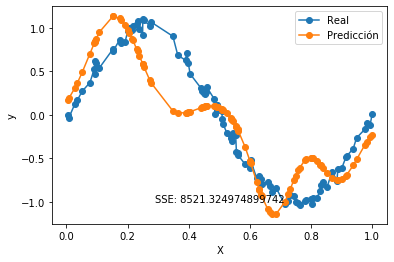

In [29]:
# Dibujar la función real y la función aprendida por el modelo
plt.plot(X, y, marker='o', label='Real')             # Función real
plt.plot(X, y_pred2, marker='o', label='Predicción') # Función aprendida
plt.xlabel('X')
plt.ylabel('y')
plt.text(x=0.5, y=-1, s='SSE: {}'.format(error_SSE2), horizontalalignment='center')
plt.legend()

plt.show()

La forma de la función aprendida por el modelo difiere de la forma real de la función: gráficamente se observa que presenta 4 óptimos locales en lugar de los 2 óptimos locales de la función real en el dominio de la muestra usada en el entrenamiento. No obstante, el error cometido por el modelo se ha reducido respecto del modelo que considera únicamente 2 bases.

Se prueba ahora a mantener 2 nodos en capa oculta y a considerar una desviación típica común a todos los nodos en capa oculta:

In [30]:
# Entrenar un modelo con k=2 e inferStds=False
rbfnet3 = RBFNet(lr=1e-2, k=2, inferStds=False)
rbfnet3.fit(X, y, verbose=True)

y_pred3 = rbfnet3.predict(X)
error_SSE3 = np.sum((y-y_pred3)**2)

print('Error SSE cometido: ', error_SSE3)

Epoch: 1 - Loss: 1.82
Epoch: 1 - Loss: 1.88
Epoch: 1 - Loss: 1.59
Epoch: 1 - Loss: 1.49
Epoch: 1 - Loss: 1.33
Epoch: 1 - Loss: 1.23
Epoch: 1 - Loss: 0.95
Epoch: 1 - Loss: 1.04
Epoch: 1 - Loss: 0.74
Epoch: 1 - Loss: 0.76
Epoch: 1 - Loss: 0.89
Epoch: 1 - Loss: 0.65
Epoch: 1 - Loss: 0.67
Epoch: 1 - Loss: 0.50
Epoch: 1 - Loss: 0.54
Epoch: 1 - Loss: 0.53
Epoch: 1 - Loss: 0.36
Epoch: 1 - Loss: 0.31
Epoch: 1 - Loss: 0.32
Epoch: 1 - Loss: 0.27
Epoch: 1 - Loss: 0.24
Epoch: 1 - Loss: 0.20
Epoch: 1 - Loss: 0.29
Epoch: 1 - Loss: 0.35
Epoch: 1 - Loss: 0.16
Epoch: 1 - Loss: 0.16
Epoch: 1 - Loss: 0.21
Epoch: 1 - Loss: 0.16
Epoch: 1 - Loss: 0.24
Epoch: 1 - Loss: 0.46
Epoch: 1 - Loss: 0.46
Epoch: 1 - Loss: 0.34
Epoch: 1 - Loss: 0.46
Epoch: 1 - Loss: 0.60
Epoch: 1 - Loss: 0.73
Epoch: 1 - Loss: 0.75
Epoch: 1 - Loss: 0.75
Epoch: 1 - Loss: 0.72
Epoch: 1 - Loss: 0.65
Epoch: 1 - Loss: 0.54
Epoch: 1 - Loss: 0.66
Epoch: 1 - Loss: 0.93
Epoch: 1 - Loss: 0.68
Epoch: 1 - Loss: 0.66
Epoch: 1 - Loss: 0.73
Epoch: 1 -

Epoch: 26 - Loss: 0.05
Epoch: 26 - Loss: 0.04
Epoch: 26 - Loss: 0.06
Epoch: 26 - Loss: 0.08
Epoch: 26 - Loss: 0.01
Epoch: 26 - Loss: 0.03
Epoch: 26 - Loss: 0.06
Epoch: 26 - Loss: 0.03
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.01
Epoch: 26 - Loss: 0.03
Epoch: 26 - Loss: 0.02
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.02
Epoch: 26 - Loss: 0.02
Epoch: 26 - Loss: 0.01
Epoch: 26 - Loss: 0.01
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.02
Epoch: 26 - Loss: 0.02
Epoch: 26 - Loss: 0.02
Epoch: 26 - Loss: 0.02
Epoch: 26 - Loss: 0.01
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.00
Epoch: 26 - Loss: 0.03
Epoch: 26 - Loss: 0.01
Epoch: 26 - Loss: 0.01
Epoch: 26 - Loss: 0.01
Epoch: 26 - Loss: 0.03
Epoch: 26 - Loss: 0.03
Epoch: 26 - Loss: 0.01
Epoch: 26 -

Epoch: 52 - Loss: 0.01
Epoch: 52 - Loss: 0.01
Epoch: 52 - Loss: 0.01
Epoch: 52 - Loss: 0.03
Epoch: 52 - Loss: 0.03
Epoch: 52 - Loss: 0.01
Epoch: 52 - Loss: 0.01
Epoch: 52 - Loss: 0.03
Epoch: 52 - Loss: 0.01
Epoch: 52 - Loss: 0.05
Epoch: 52 - Loss: 0.03
Epoch: 52 - Loss: 0.01
Epoch: 52 - Loss: 0.01
Epoch: 52 - Loss: 0.03
Epoch: 52 - Loss: 0.02
Epoch: 52 - Loss: 0.03
Epoch: 52 - Loss: 0.02
Epoch: 52 - Loss: 0.01
Epoch: 52 - Loss: 0.01
Epoch: 52 - Loss: 0.03
Epoch: 52 - Loss: 0.01
Epoch: 52 - Loss: 0.01
Epoch: 52 - Loss: 0.00
Epoch: 52 - Loss: 0.00
Epoch: 52 - Loss: 0.00
Epoch: 52 - Loss: 0.00
Epoch: 52 - Loss: 0.02
Epoch: 52 - Loss: 0.00
Epoch: 52 - Loss: 0.02
Epoch: 52 - Loss: 0.02
Epoch: 52 - Loss: 0.06
Epoch: 52 - Loss: 0.06
Epoch: 52 - Loss: 0.08
Epoch: 52 - Loss: 0.15
Epoch: 52 - Loss: 0.19
Epoch: 52 - Loss: 0.24
Epoch: 52 - Loss: 0.20
Epoch: 52 - Loss: 0.30
Epoch: 53 - Loss: 0.30
Epoch: 53 - Loss: 0.34
Epoch: 53 - Loss: 0.22
Epoch: 53 - Loss: 0.20
Epoch: 53 - Loss: 0.15
Epoch: 53 -

Epoch: 78 - Loss: 0.02
Epoch: 78 - Loss: 0.05
Epoch: 78 - Loss: 0.06
Epoch: 78 - Loss: 0.08
Epoch: 78 - Loss: 0.15
Epoch: 78 - Loss: 0.18
Epoch: 78 - Loss: 0.23
Epoch: 78 - Loss: 0.19
Epoch: 78 - Loss: 0.29
Epoch: 79 - Loss: 0.31
Epoch: 79 - Loss: 0.35
Epoch: 79 - Loss: 0.23
Epoch: 79 - Loss: 0.20
Epoch: 79 - Loss: 0.15
Epoch: 79 - Loss: 0.12
Epoch: 79 - Loss: 0.05
Epoch: 79 - Loss: 0.08
Epoch: 79 - Loss: 0.02
Epoch: 79 - Loss: 0.02
Epoch: 79 - Loss: 0.05
Epoch: 79 - Loss: 0.01
Epoch: 79 - Loss: 0.01
Epoch: 79 - Loss: 0.00
Epoch: 79 - Loss: 0.00
Epoch: 79 - Loss: 0.00
Epoch: 79 - Loss: 0.01
Epoch: 79 - Loss: 0.02
Epoch: 79 - Loss: 0.01
Epoch: 79 - Loss: 0.02
Epoch: 79 - Loss: 0.03
Epoch: 79 - Loss: 0.04
Epoch: 79 - Loss: 0.01
Epoch: 79 - Loss: 0.00
Epoch: 79 - Loss: 0.06
Epoch: 79 - Loss: 0.05
Epoch: 79 - Loss: 0.04
Epoch: 79 - Loss: 0.06
Epoch: 79 - Loss: 0.08
Epoch: 79 - Loss: 0.01
Epoch: 79 - Loss: 0.03
Epoch: 79 - Loss: 0.07
Epoch: 79 - Loss: 0.03
Epoch: 79 - Loss: 0.00
Epoch: 79 -

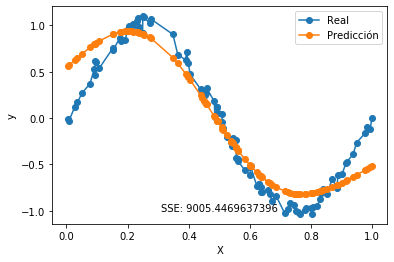

In [31]:
# Dibujar la función real y la función aprendida por el modelo
plt.plot(X, y, marker='o', label='Real')             # Función real
plt.plot(X, y_pred3, marker='o', label='Predicción') # Función aprendida
plt.xlabel('X')
plt.ylabel('y')
plt.text(x=0.5, y=-1, s='SSE: {}'.format(error_SSE3), horizontalalignment='center')
plt.legend()

plt.show()

El error cometido por el modelo es inferior al modelo original que consideraba también 2 centros en capa oculta. No obstante, se ha incrementado respecto del modelo que consideraba 4 bases. Por otra parte, se observa que la función aprendida por el modelo se asemeja en mayor medida a la función seno sin la presencia de ruido, es decir, el modelo ha logrado obviar la mayor parte del ruido presente en la muestra original.

Se prueba a elaborar otro modelo con 4 bases y que estime un valor de desviación tipica común para todas las neuronas

In [45]:
# Entrenar un modelo con k=4 e inferStds=False
rbfnet4 = RBFNet(lr=1e-2, k=4, inferStds=False)
rbfnet4.fit(X, y)

y_pred4 = rbfnet4.predict(X)
error_SSE4 = np.sum((y-y_pred4)**2)

print('Error SSE cometido: ', error_SSE4)

Error SSE cometido:  8593.112541802322


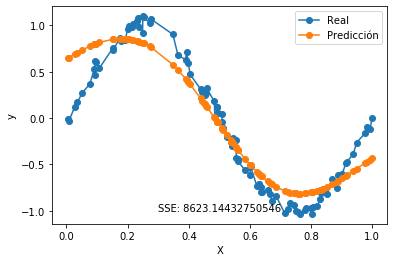

In [39]:
# Dibujar la función real y la función aprendida por el modelo
plt.plot(X, y, marker='o', label='Real')             # Función real
plt.plot(X, y_pred4, marker='o', label='Predicción') # Función aprendida
plt.xlabel('X')
plt.ylabel('y')
plt.text(x=0.5, y=-1, s='SSE: {}'.format(error_SSE4), horizontalalignment='center')
plt.legend()

plt.show()

En este caso, el error cometido por este modelo es superior al modelo que consideraba la estimación de una desviación estándar para cada nodo oculto, pero al igual que en el anterior modelo en el que las desviaciones típicas de las bases se calculan de forma común para todos los nodos, la curva aprendida por el modelo carece del ruido presente en los datos de entrenamiento.

Se observa, por tanto, que la **estimación fija de la desviación típica para todos los nodos ocultos permite a los modelos obviar el ruido de los datos de entrenamiento**.

Realizamos una última batería de experimentos considerando valores otros valores de *k* y la estimación de las desviaciones para cada nodo oculta o de forma global para todos ellos, de este modo se probarán el siguiente conjunto de valores para cada parámetro:

- $k \in [3,5,6,7]$
- $inferStds \in [True, False]$ 

In [43]:
# Realizamos una batería de experiemntaciones
for k in (3,5,6,7):
    for inf_stds in (True, False):
        rbfnet = RBFNet(lr=1e-2, k=k, inferStds=inf_stds)
        rbfnet.fit(X, y)

        y_pred = rbfnet.predict(X)
        error_SSE = np.sum((y-y_pred)**2)

        print('[K={}, inferStds={}] - Error SSE cometido: {}'.format(k, inf_stds, error_SSE))

[K=3, inferStds=True] - Error SSE cometido: 8093.953309203311
[K=3, inferStds=False] - Error SSE cometido: 8527.96761889553
[K=5, inferStds=True] - Error SSE cometido: 8562.643135047065
[K=5, inferStds=False] - Error SSE cometido: 8733.780433709806
[K=6, inferStds=True] - Error SSE cometido: 8817.426039528833
[K=6, inferStds=False] - Error SSE cometido: 8736.349157421717
[K=7, inferStds=True] - Error SSE cometido: 8796.694747272331
[K=7, inferStds=False] - Error SSE cometido: 8888.872470295504


Recogemos en una tabla los resultados obtenidos con los diferentes parámetros probados:

| Nº centros | *std* fijo |    Error SSE      |
| :--------: | :--------: | :---------------: |
|     2      |    No      | 9289.319229085633 |
|            |    Sí      | 9005.4469637396   |
|     3      |    No      | **8093.953309203311** |
|            |    Sí      | 8527.96761889553  |
|     4      |    No      | 8521.324974899742 |
|            |    Sí      | 8623.14432750546  |
|     5      |    No      | 8562.643135047065 |
|            |    Sí      | 8733.780433709806 |
|     6      |    No      | 8817.426039528833 |
|            |    Sí      | 8736.349157421717 |
|     7      |    No      | 8796.694747272331 |
|            |    Sí      | 8888.872470295504 |

El mejor modelo se obtiene considerando 3 bases gausianas y el ajuste de una desviación típica para cada nodo oculto

Error SSE cometido:  8015.800295573168


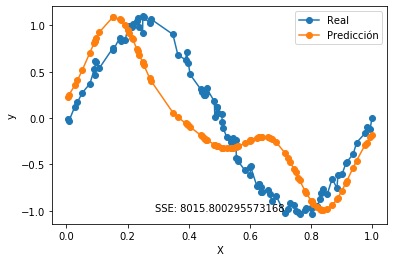

In [44]:
# Entrenar un modelo con k=3 e inferStds=True
rbfnet5 = RBFNet(lr=1e-2, k=3, inferStds=True)
rbfnet5.fit(X, y)

y_pred5 = rbfnet5.predict(X)
error_SSE5 = np.sum((y-y_pred5)**2)

print('Error SSE cometido: ', error_SSE5)

# Dibujar la función real y la función aprendida por el modelo
plt.plot(X, y, marker='o', label='Real')             # Función real
plt.plot(X, y_pred5, marker='o', label='Predicción') # Función aprendida
plt.xlabel('X')
plt.ylabel('y')
plt.text(x=0.5, y=-1, s='SSE: {}'.format(error_SSE5), horizontalalignment='center')
plt.legend()

plt.show()